In [1]:
#coding=utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import random



In [2]:

PATH_TRAIN = './input/train.csv'
PATH_TEST = './input/test.csv'


def import_data(path_train, path_test):
    '''
    Import train data and test data from path.
    '''
    data_train = pd.read_csv(path_train).as_matrix()
    test_train = pd.read_csv(path_test).as_matrix()
    return data_train, test_train

def preprocess_raw_data(data):
    '''
    And divide it into train set and validation set with ratio 8 : 2.
    Preprocess train data into sample, label.
    '''
    
    # Shuffling data set.
    random.shuffle(data)
    
    rate = 0.8
    num_train = round(data.shape[0]*rate)
    num_validation = data.shape[0]-num_train
    
    data_train = data[0: num_train, 1:]
    labels_train = data[0: num_train, 0].reshape(num_train, 1)
    data_validation = data[num_train:, 1:]
    labels_validation = data[num_train:, 0].reshape(num_validation, 1)
    
    return data_train, labels_train, data_validation, labels_validation


In [3]:
def my_means(data_train, labels_train):
    '''
    My means function to test result of means.
    '''
    centers_m = np.zeros([10, data_train.shape[1]])
    sum_cluster = np.zeros(10)
    # means
    for i in range(data_train.shape[0]):
        label = labels_train[i]
        sum_ = sum_cluster[label]
        centers_m[label] = centers_m[label]*(sum_/(sum_+1)) + data_train[i]*(1/(sum_+1))
        sum_cluster[label] += 1
    
    # show mean image.
    for i in range(10):
        temp = np.array(centers_m[i])
        temp = temp.reshape(28, 28)
        plt.subplot(2, 5, 1+i).imshow(temp, cmap='gray')
        plt.title(i)

    plt.show()
    
    # m_predictor
    class MPredictor:
        '''
        This is temporary class to implement mean predict.
        '''
        __centers = centers_m
        def __eucldist(self, x, y):
            '''
            Calculate Eucl distance.
            '''
            return np.sqrt(np.sum((x-y)**2))
        def predict(self, sample):
            '''
            Predict sample's label by clustering to different centers.
            '''
            label = 0
            min_dist = self.__eucldist(self.__centers[0], sample)
            for i in range(1, self.__centers.shape[0]):
                dist = self.__eucldist(self.__centers[i], sample)
                if dist < min_dist:
                    min_dist = dist
                    label = i
                    
            return label
                
    
    return MPredictor()

In [4]:
def test_validation(predictor, data_validation, labels_validation):
    '''
    Test correct rate of predictor
    '''
    num_total = labels_validation.shape[0]
    num_correct = 0
    for i in range(num_total):
        label_p = predictor.predict(data_validation[i])
        if label_p == labels_validation[i]:
            num_correct += 1
            
    return num_correct/num_total

In [5]:
data_train, data_test = import_data(PATH_TRAIN, PATH_TEST)
data_train, labels_train, data_validation, labels_validation = preprocess_raw_data(data_train)

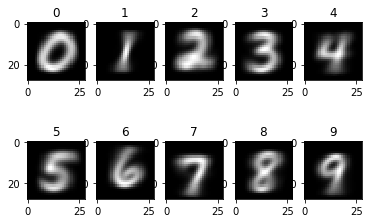

0.7921428571428571


In [6]:
m_predict = my_means(data_train, labels_train)
print(test_validation(m_predict, data_validation, labels_validation))

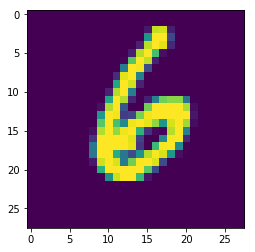

6

In [7]:
# Try km_predictor
k = 9
plt.imshow(data_validation[k].reshape(28, 28))
plt.show()
m_predict.predict(data_validation[k])